## Clustering & PCA Assignment

#### To categorise the countries using some socio-economic and health factors that determine the overall development of the country and suggest the countries which the CEO needs to focus on the most.  

Following are the steps to be performed on the given dataset

      1) Perform PCA on the dataset and obtain the new dataset with the Principal Components. Choose the appropriate number of components k.
      2) Perform the clustering activity on this new dataset, i.e. the PCA modified dataset with the k components.
      3) Try both K-means and Hierarchical clustering on this dataset and create clusters
      4) Analyse the clusters and identify the ones which are in dire need of aid

#### Importing Libraries



In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading the Data Set

In [2]:
country_data = pd.read_csv("C:\\Users\\BHASSRIN\\Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)


### Data quality check and cleaning

In [4]:
country_data.head(6)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [5]:
#Sanity Check
country_data.shape
country_data.describe()
country_data.info()
country_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
#Na checks and Handling
country_data.isnull().values.any()
country_data.isnull().values.sum()

0

In [7]:
len(country_data['country'].unique().tolist())

167

In [8]:
# standardise the parameters
# Drop the object data type called country

country_data = country_data.drop(['country'], axis=1)

# Scale the data.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(country_data)

In [9]:
dat2

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### Let's begin with analysis part 

### 1. Principal Component Analysis

In [10]:
country_data.shape

(167, 9)

In [11]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [12]:
#Performing the PCA
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [13]:
#List of PCA components.
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [14]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

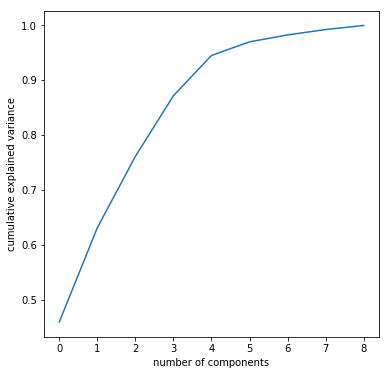

In [15]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Around 88% of the information is being explained by 3 components

In [16]:
#Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(country_data.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.419519,0.192884,-0.029544
1,exports,0.283897,0.613163,0.144761
2,health,0.150838,-0.243087,-0.596632
3,imports,0.161482,0.671821,-0.299927
4,income,0.398441,0.022536,0.301548
5,inflation,-0.193173,-0.008404,0.642520
6,life_expec,0.425839,-0.222707,0.113919
7,total_fer,-0.403729,0.155233,0.019549
8,gdpp,0.392645,-0.046022,0.122977


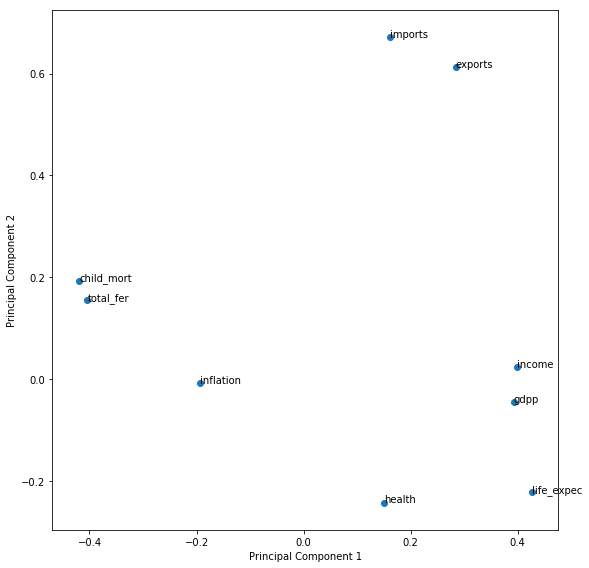

In [17]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [18]:
#Finally let's go ahead and do dimenstionality reduction using the two Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [19]:
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(167, 3)

In [20]:
#df_pca

In [21]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [22]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2]})
pcs_df2.head()

,PC1,PC2,PC3
0,-2.917491,0.006782,1.149719
1,0.427164,-0.849421,-0.524328
2,-0.270015,-0.176265,-1.555131
3,-2.928291,2.207142,-0.427484
4,1.026479,-0.071315,-0.286053


In [23]:

cntry_data = pd.read_csv("C:\\Users\\BHASSRIN\\Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
cntry_names = cntry_data['country']
colnames = list(cntry_data.columns)
country_data =  pd.concat([cntry_names, country_data], axis=1)
# Since we are going for outlier removal added the country name
pcs_df2 =  pd.concat([cntry_names, pcs_df2], axis=1)

In [25]:

country_data.head()
#pcs_df2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


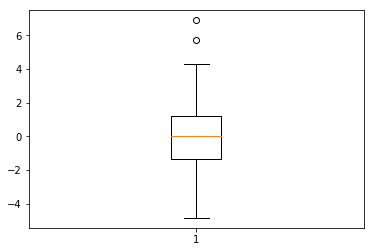

In [26]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.25)
Q3 = pcs_df2.PC1.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1 - 1.5*IQR) & (pcs_df2.PC1 <= Q3 + 1.5*IQR)]

In [27]:
pcs_df2.shape

(165, 4)

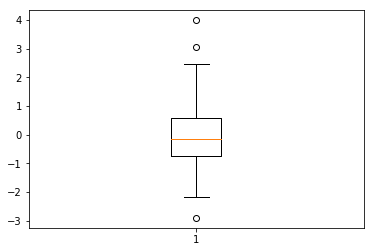

In [28]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.25)
Q3 = pcs_df2.PC2.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1 - 1.5*IQR) & (pcs_df2.PC2 <= Q3 + 1.5*IQR)]

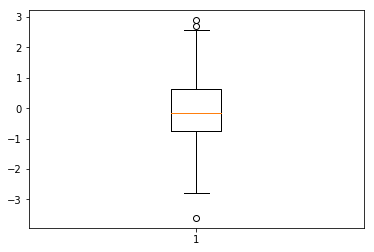

In [29]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.25)
Q3 = pcs_df2.PC3.quantile(0.75)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1 - 1.5*IQR) & (pcs_df2.PC3 <= Q3 + 1.5*IQR)]

In [30]:
pcs_df2.shape

(159, 4)

In [31]:
# Storing this in another data frame to retain the country name. PLEASE NOTE
pcs_df3 = pcs_df2

pcs_df2 = pcs_df2.drop(['country'], axis=1)
type(pcs_df3)
pcs_df2
pcs_df3

,country,PC1,PC2,PC3
0,Afghanistan,-2.917491,0.006782,1.149719
1,Albania,0.427164,-0.849421,-0.524328
2,Algeria,-0.270015,-0.176265,-1.555131
3,Angola,-2.928291,2.207142,-0.427484
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053
5,Argentina,0.049829,-1.419314,-1.034342
6,Armenia,-0.100472,-0.690522,-1.160992
7,Australia,2.367607,-1.572229,0.189644
8,Austria,2.979601,-0.643400,1.015315
9,Azerbaijan,-0.169149,-0.165917,-1.003057


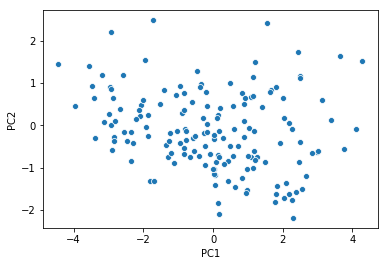

In [32]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

#Some distinct clusters are already visible to us.
#Let's go ahead and begin with the clustering process
First we will do K-Means clustering & then Heirarchical clustering.

## Clustering 

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [33]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(pcs_df2)

0.7055431207445431

#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [36]:
country_data_1 = pcs_df2

### K- means Clustering

In [37]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(country_data_1)
    sse_.append([k, silhouette_score(country_data_1, kmeans.labels_)])

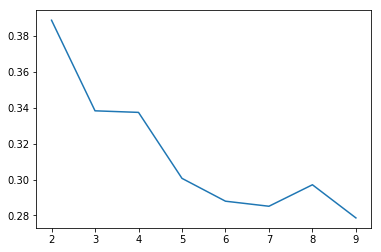

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

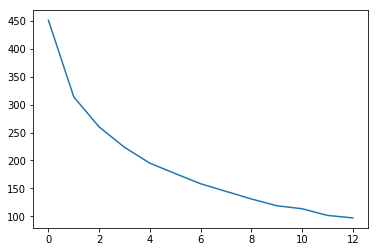

In [71]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(2,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_data_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [40]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(country_data_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [41]:
dat4=pcs_df3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'ClusterID']
dat_km

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.917491,0.006782,1.149719,0
1,Albania,0.427164,-0.849421,-0.524328,1
2,Algeria,-0.270015,-0.176265,-1.555131,1
3,Angola,-2.928291,2.207142,-0.427484,0
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,1
5,Argentina,0.049829,-1.419314,-1.034342,1
6,Armenia,-0.100472,-0.690522,-1.160992,1
7,Australia,2.367607,-1.572229,0.189644,1
8,Austria,2.979601,-0.643400,1.015315,1
9,Azerbaijan,-0.169149,-0.165917,-1.003057,1


In [42]:
dat_km['ClusterID'].value_counts()

1    95
0    64
Name: ClusterID, dtype: int64

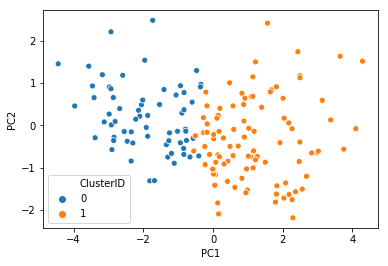

In [43]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [45]:
#country_data =  pd.concat([cntry_names, country_data], axis=1)
country_data
dat5=pd.merge(country_data,dat_km, how='inner', on='country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.917491,0.006782,1.149719,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.427164,-0.849421,-0.524328,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.270015,-0.176265,-1.555131,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.928291,2.207142,-0.427484,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.026479,-0.071315,-0.286053,1


In [46]:
#So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints
dat6=dat5.drop(['PC1','PC2', 'PC3',],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [47]:
clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 		pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 		pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 		pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 		pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 			pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())


In [48]:
df = pd.concat([pd.Series([0,1]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [49]:
df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,74.329688,29.435922,5.963750,42.152592,3836.453125,9.628047,62.206250,4.387031,1778.078125
1,1,12.466316,44.961053,7.219053,46.075789,24570.526316,5.644495,76.314737,1.958947,19044.105263


After going through all the above figures, there is a huge gap in countries present in cluster 0 and cluster 1 Except health and imports. 
We can clearly see the "Developed countries" and "Under developed countries" are categorized into two separate clustors "0" and "1" respectively 
We consider child_mort, inflation, health, life_expec, gdpp, income to filter out the countries.

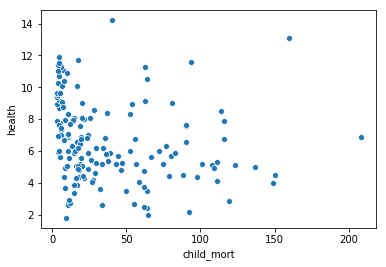

In [50]:
sns.scatterplot(x='child_mort',y='health',data=dat6)
# The child_mort rate is less when the amount spend on health is high hence we need to consider
# countries where child_mort rate is very high.

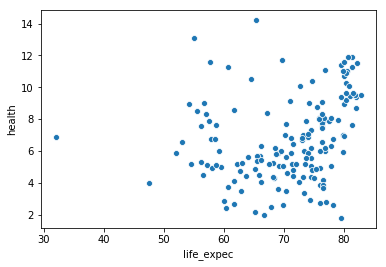

In [51]:
sns.scatterplot(x='life_expec',y='health',data=dat6)
# Life expectency would be high where the amount spent on health is also high.
# Hence need to consider the countries where the life expectency is below 60.

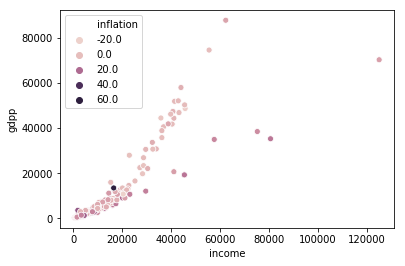

In [52]:
sns.scatterplot(x='income',y='gdpp', hue ='inflation', data=dat6)
# The gdpp and inflation are inversely proptional.
# The low net income per person countries are having very high inflation and low gdpp.
# Hence need to consider very low income countries.

In [53]:
Final_Selection_KM = country_data[country_data['child_mort']>=70.0]
Final_Selection_KM = Final_Selection_KM[Final_Selection_KM['inflation']>=7.0]
Final_Selection_KM = Final_Selection_KM[Final_Selection_KM['life_expec']<=60.0]
Final_Selection_KM = Final_Selection_KM[Final_Selection_KM['income']<=3000.0]

In [54]:
Final_Selection_KM.shape

(9, 10)

In [55]:
Final_Selection_KM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
147,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702
155,Uganda,81.0,17.10,9.01,28.6,1540,10.60,56.8,6.15,595


## Heirarchical Clustering

Now let us build the heirarchical clustering model for the same data set
which we prepared after PCA analysis i.e., country_data_1

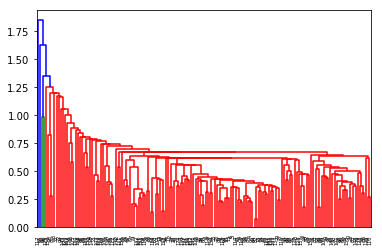

In [56]:
#country_data1

# heirarchical clustering
mergings = linkage(country_data_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

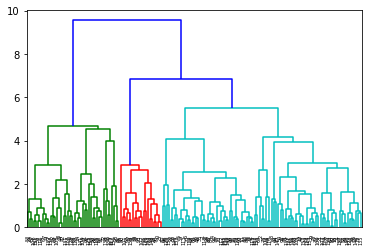

In [57]:
mergings = linkage(country_data_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))

In [59]:
dat_hc = pd.concat([dat4, clusterCut], axis=1)
dat_hc.columns = ['country', 'PC1', 'PC2', 'PC3', 'ClusterID']
dat_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.917491,0.006782,1.149719,0
1,Albania,0.427164,-0.849421,-0.524328,0
2,Algeria,-0.270015,-0.176265,-1.555131,0
3,Angola,-2.928291,2.207142,-0.427484,0
4,Antigua and Barbuda,1.026479,-0.071315,-0.286053,0


In [60]:
hc_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
hc_exports = 		pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
hc_health = 		pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
hc_imports = 		pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
hc_income = 		pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
hc_inflation = 		pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer = 		pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp = 			pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [61]:
df_hc = pd.concat([pd.Series([0,1]),hc_child_mort,hc_exports,hc_health,hc_imports,hc_income,hc_inflation,hc_life_expec,hc_total_fer,hc_gdpp], axis=1)

In [62]:
df_hc.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_hc

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,74.329688,29.435922,5.963750,42.152592,3836.453125,9.628047,62.206250,4.387031,1778.078125
1,1,12.466316,44.961053,7.219053,46.075789,24570.526316,5.644495,76.314737,1.958947,19044.105263


After going through all the above figures, there is a huge gap in countries present in cluster 0 and cluster 1 Except health and imports. We can clearly see the "Developed countries" and "Under developed countries" are 
categorized into two separate clustors "0" and "1" respectively
We consider child_mort, inflation, health, life_expec, gdpp, income to filter out the countries.

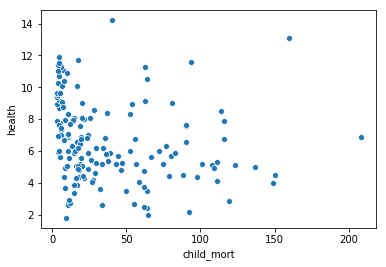

In [63]:
sns.scatterplot(x='child_mort',y='health',data=dat6)
# The child_mort rate is less when the amount spend on health is high hence we need to consider
# countries where child_mort rate is very high.

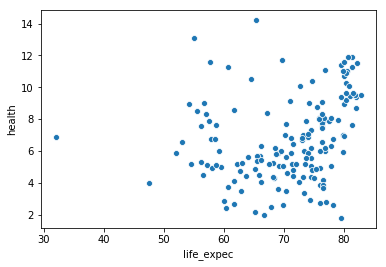

In [64]:
sns.scatterplot(x='life_expec',y='health',data=dat6)
# Life expectency would be high where the amount spent on health is also high.
# Hence need to consider the countries where the life expectency is below 60.

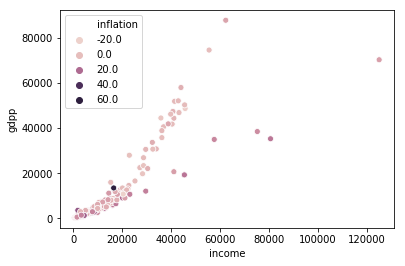

In [65]:
sns.scatterplot(x='income',y='gdpp', hue ='inflation', data=dat6)
# The gdpp and inflation are inversely proptional.
# The low net income per person countries are having very high inflation and low gdpp.
# Hence need to consider very low income countries.

In [66]:
Final_Selection_HC = country_data[country_data['child_mort']>=70.0]
Final_Selection_HC = Final_Selection_HC[Final_Selection_HC['inflation']>=7.0]
Final_Selection_HC = Final_Selection_HC[Final_Selection_HC['life_expec']<=60.0]
Final_Selection_HC = Final_Selection_HC[Final_Selection_HC['income']<=3000.0]

In [67]:
Final_Selection_HC.shape

(9, 10)

In [68]:
Final_Selection_HC

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
147,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702
155,Uganda,81.0,17.10,9.01,28.6,1540,10.60,56.8,6.15,595


The following are the countries which are direst need of aid 

In [69]:
Final_Selection_HC['country']

0           Afghanistan
26              Burundi
37     Congo, Dem. Rep.
63               Guinea
94               Malawi
106          Mozambique
132        Sierra Leone
147            Tanzania
155              Uganda
Name: country, dtype: object